# Probability, Information (Surprise), Cross-Entropy, KL Divergence  


- Information (surprize):  $I(x) = -\log p(x)$
- Entropy:  $H(P) = \mathbb{E}_{x \sim P}[-\log p(x)]$
- Cross-entropy:  $H(P,Q) = \mathbb{E}_{x \sim P}[-\log q(x)]$
- KL divergence:  $$D_{KL}(P \| Q) = \mathbb{E}_{x \sim P}\left[\log \frac{p(x)}{q(x)}\right]$$

## Entropy

Entropy is the expected surprisal:

$$
H(P) = \sum_i p_i (-\log p_i)
$$

- Low entropy → predictable distribution  
- High entropy → uncertain (uniform) distribution  
- Maximum entropy for $K$ classes is $\log K$


## Cross-Entropy

Cross-entropy measures how well model distribution $Q$ matches true distribution $P$:

$$
H(P,Q) = \sum_i p_i (-\log q_i)
$$

## KL Divergence

KL divergence measures mismatch between distributions:

$$
D_{KL}(P \| Q) = \sum_i p_i \log \frac{p_i}{q_i}
$$

Important identity:

$$
D_{KL}(P \| Q)=H(P,Q)-H(P)
$$

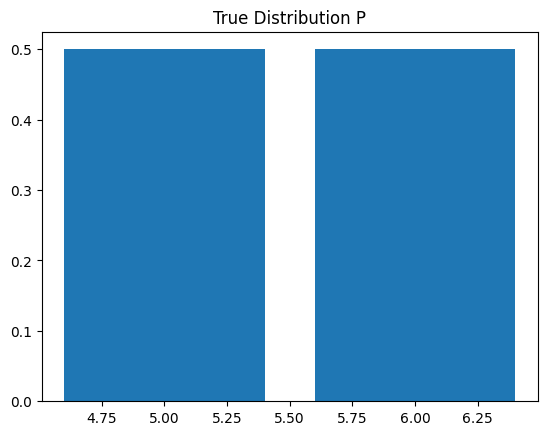

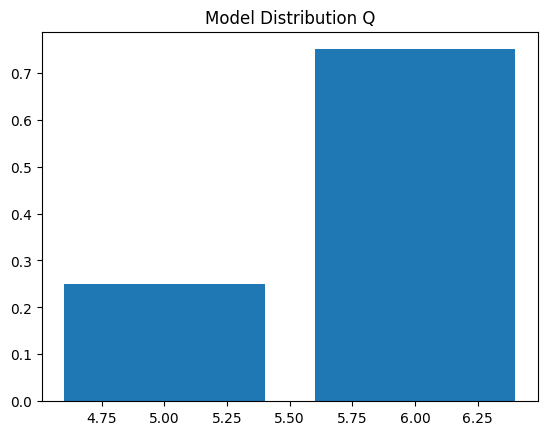

1.0
1.207518749639422
0.2075187496394219


In [6]:
import numpy as np
import matplotlib.pyplot as plt
def normalize(p):
  p = np.array(p, dtype=float)
  p = np.clip(p, 0, None)
  s = p.sum()
  if s == 0:
      raise ValueError("Sum is zero; cannot normalize.")
  return p / s
def surprisal(p, base=2):
  return -np.log(p) / np.log(base)
def entropy(P, base=2):
  return np.sum (P*(-np.log(P) / np.log(base)))
def cross_entropy(P, Q, base=2, eps=1e-12):
  return np.sum(P * (-np.log(Q) / np.log(base)))
def kl_divergence(P, Q, base=2, eps=1e-12):
  P = np.clip(P, eps, 1.0)
  Q = np.clip(Q, eps, 1.0)
  return np.sum(P * ((np.log(P) - np.log(Q)) / np.log(base)))

P = normalize([0.5,0.5])
Q = normalize([0.25,0.75])
indexes=[k+5 for k in range(len(P))]

plt.figure()
plt.bar(indexes,P)
plt.title("True Distribution P")
plt.show()

plt.figure()
plt.bar(indexes,Q)
plt.title("Model Distribution Q")
plt.show()

print(entropy(P))
print(cross_entropy(P,Q))
print(kl_divergence(P,Q))